##### 모델링 : 함수 찾기
- 집의 평수를 알면 가격을 알 수 있을까?
- Y = aX + b
- 데이터를 잘 설명하는 직선 하나를 찾는 것이 모델링
##### 손으로 숫자를 그린 이미지를 보고 숫자 7인지 1인지 맞출 수 있을까?
- 아주 복잡한 결정경계를 그린다. 경계를 그려주는 함수를 찾아내는 과정
##### ANN 인공신경망
- 단일층 : 신경망이 하나 퍼셉트론 1x1 -> 뉴런

##### 활성화함수...
- 계단함수 : 
- 시그모이드 : 연속적인 값을 출력 - 미분이 가능 - 오차 역전파
- 활성화 함수가 없다... f(z) = z
- y = (W100 x ...W1)X -> 거대한 1층짜리 선형모델
- 초기 활성화 함수(스위치)
    - 계단함수 if x > 0 1
                 x <=  0
- 시그모이드

##### 다층신경망 MLP 퍼셉트론을 여러개 쌓아서 올린 구조
    - input layer : 데이터가 들어오는 곳(뉴런 수 데이터의 특성 28 x 28 = 784)
    - hidden layer : 입력과 출력 사이에 있는 레이어

In [1]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
# MNIST 데이터셋 로드
from sklearn.datasets import fetch_openml
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# X,y = fetch_openml('mnist_784',version=1 ,return_X_y=True, parser='auto')

In [ ]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train.shapSe, y_train.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


((60000, 28, 28), (60000,))

In [4]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

4
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38
  190  25   0   0   0   0   0   0   0   0]
 [  0   0   0  13  25  10   0   0   0   0   0   0   0   0   0   0   0 112
  252 125   4   0   0   0   0   0   0   0]
 [  0   0   0 132 252 113   0   0   0   0   0   0   0   0   0   0   0  61
  252 252  36   0   0   0   0   0   0   0]
 [  0   0   0 132 252 240  79   0   0   0   0   0   0   0   0   0   0  84
  252 252  36   0   0   0   0   0   0   0]
 [  0   0   0 132 252 252 238  52   0   0   0   0   0   0   0 

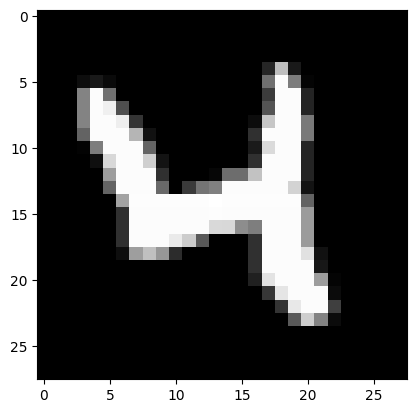

In [5]:
print(y_train[20])
plt.imshow(x_train[20],cmap='gray')  
print(x_train[20])

In [12]:
# 스케일링 표준화
x_train = x_train.astype('float32') / 255.0 
x_test = x_test.astype('float32') / 255.0

In [13]:
model = tf.keras.Sequential([
    # 1층 입력층  28 x 28 2D -->784 1D
    tf.keras.layers.Flatten(input_shape=(28,28)),
    # 2층 은닉층 
    tf.keras.layers.Dense(128,activation = 'relu'),
    # 출력층
    tf.keras.layers.Dense(10,activation = 'sigmoid')    
])
model.summary()

c:\Users\sally\SKNPYWORKSPACE\streamlit\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(
    optimizer = 'adam', # 빠르고 안정적인
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [15]:
history = model.fit(
    x_train,
    y_train,
    epochs = 5,
    validation_data = (x_test, y_test),
    verbose = 1  # 로그 출력
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1120 - loss: 2.3015 - val_accuracy: 0.1135 - val_loss: 2.3009
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1124 - loss: 2.3010 - val_accuracy: 0.1135 - val_loss: 2.3006
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1124 - loss: 2.3005 - val_accuracy: 0.1135 - val_loss: 2.2994
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1124 - loss: 2.2989 - val_accuracy: 0.1156 - val_loss: 2.2972
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1182 - loss: 2.2951 - val_accuracy: 0.1185 - val_loss: 2.2915


In [16]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

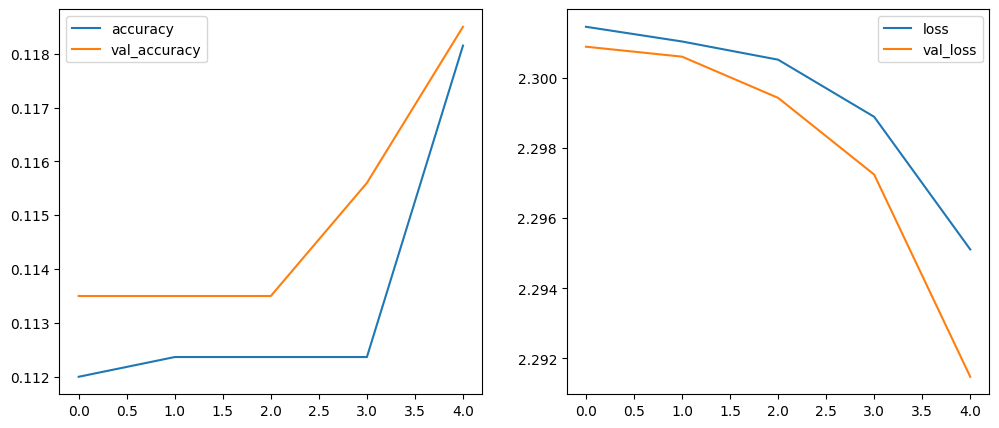

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label = 'accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_loss'],label = 'val_loss')
plt.legend()

plt.show()

- 정답의 종류 클래스
#### 소프트맥스
- 확률 전체 클래스에 대해서 0~1 다 합치면 1이 되는 구조
#### 시그모이드
- 각 클래스에 대해서 확률을 0~1 사이로 변환 0.5 0.6 0.1

In [19]:
pred = model.predict(x_test)
np.argmax(pred[0]), y_test[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


(np.int64(1), np.uint8(7))

In [20]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1185 - loss: 2.2915


[2.291476249694824, 0.1185000017285347]

In [21]:
np.argmax(pred, axis=1)

array([1, 1, 1, ..., 1, 1, 1], shape=(10000,))

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.94      0.05      0.10       980
           1       0.11      1.00      0.20      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.12     10000
   macro avg       0.11      0.11      0.03     10000
weighted avg       0.11      0.12      0.03     10000



c:\Users\sally\SKNPYWORKSPACE\streamlit\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\sally\SKNPYWORKSPACE\streamlit\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\sally\SKNPYWORKSPACE\streamlit\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", 